# Meteostats - Dados Meteorológicos

## Objetivo

Exemplo de uso da biblioteca meteostas para obter dados meteorológicos como fontes externas

## Descrição

Obter dados metereológicos como temperatura, pressão, umidade e velocidade do vento para ser utilizada como fontes externas em projetos de ciência de dados.
A biblioteca meteostats traz as informações agrupadas por dia. trata-se de uma solução open-source que utiliza dados disponíveis de diversas fontes confiáveis e públicas e que apresenta os resultados de uma forma concisa e de fácil manipulação.

*Links úteis:*   

[Site Oficial](https://meteostat.net/en/)    
[Biblioteca python](https://dev.meteostat.net/python/)      
[Repositório](https://github.com/meteostat/meteostat-python)    
[Unidades de medida](https://dev.meteostat.net/formats.html#meteorological-parameters)

### Dicionário de dados

[Dicionário de dados oficial](https://dev.meteostat.net/formats.html#meteorological-parameters)

**TEMP:** Temperatura ambiente (°C)  
**TAVG:** Temperatura média (°C)  
**TMIN:** Temperatura mínima (°C)  
**TMAX:** Temperatura máxima (°C)  
**DWPT:** Ponto de orvalho (°C)  
**PRCP:** Precipitação total (mm)  
**WDIR:** Direção do vento (Graus)  
**WSPD:** Média da velocidade do vento (km/h)  
**WPGT:** Pico/rajada de vento (km/h)  
**RHUM:** Umidade relativa (%)  
**PRES:** Pressão atmosferica (hPa)  
**SNOW:** Profundidade de neve (cm)   
**TSUN:** Duração de luz solar (min)  
**COCO:** Código de condição climática (Ver. link acima para tabela com significado dos códigos)   

### Código

In [21]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

Declara latitude e longitude da cidade de interesse.   

In [25]:
# Exemplo: Cidade de São Paulo/SP
lat = -23.5489
lon = -46.6388
alt = 745 # opcional

# Dia de início e fim da consulta
start = datetime.today().replace(day=1) # Primeiro dia do mês corrente
finish = datetime.today() # Dia de hoje

### Informações diárias

In [26]:
# Declara objeto 'cidade' para localização
cidade = Point(lat, lon, alt) # Altitude opcional

# Busca informações por dia
data = Daily(cidade, start, finish)
data = data.fetch()
data.reset_index(inplace=True)

data.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2022-04-02,18.5,16.7,20.8,7.1,NaN,133.0,13.7,NaN,1021.0,NaN
1,2022-04-03,21.3,18.1,26.8,0.0,NaN,114.0,14.5,NaN,1019.1,NaN
2,2022-04-04,24.3,19.8,29.8,4.6,NaN,37.0,11.3,NaN,1016.6,NaN
3,2022-04-05,21.4,19.8,23.8,4.7,NaN,137.0,8.9,NaN,1017.4,NaN
4,2022-04-06,21.0,17.8,25.8,0.0,NaN,130.0,10.3,NaN,1017.3,NaN


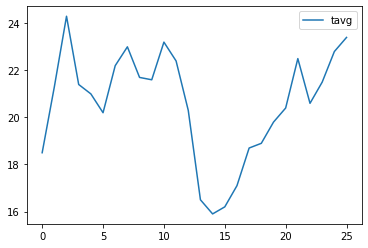

In [35]:
data.plot(y=['tavg']);

### Informações semanais

In [30]:
# Data e hora de início e fim da consulta
start_h = datetime.today().replace(day=1)
finish_h = datetime.today()

data_h = Hourly(cidade, start_h, finish_h)
data_h = data_h.fetch()
data_h.reset_index(inplace=True)

data_h.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2022-04-01 12:00:00,17.8,14.9,83.0,0.0,NaN,100.0,15.0,NaN,1023.0,NaN,8.0
1,2022-04-01 13:00:00,18.8,14.9,78.0,0.0,NaN,100.0,20.0,NaN,1023.0,NaN,8.0
2,2022-04-01 14:00:00,19.8,14.8,73.0,0.0,NaN,100.0,17.0,NaN,1023.0,NaN,8.0
3,2022-04-01 15:00:00,19.8,14.8,73.0,0.0,NaN,100.0,15.0,NaN,1022.0,NaN,9.0
4,2022-04-01 16:00:00,19.8,15.8,78.0,0.0,NaN,120.0,15.0,NaN,1022.0,NaN,8.0


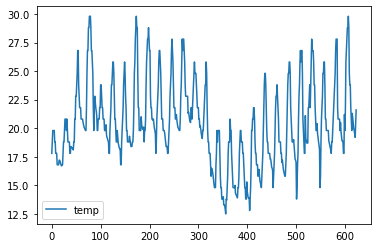

In [34]:
data_h.plot(y=['temp']);

### Exporta dados

In [8]:
# data.to_csv('weather_data.csv', index=False)